In [ ]:
pip install pydicom

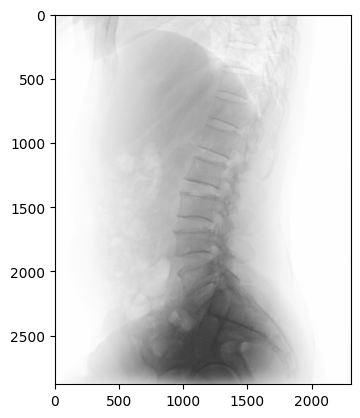

In [2]:
import pydicom as dicom 
import matplotlib.pylab as plt 
import cv2
import numpy as np

dicom_file = './27JJYP.dcm'
ds = dicom.read_file(dicom_file)

dcm_sample = ds.pixel_array * 128

def DicomtoRGB(dicomfile,bt,wt):
    """Create new image(numpy array) filled with certain color in RGB"""
    # Create black blank image
    image = np.zeros((dicomfile.shape[0], dicomfile.shape[1], 3), np.uint8)
    #loops on image height and width
    i=0
    j=0
    while i<dicomfile.shape[0]:
        j=0
        while j<dicomfile.shape[1]:
            color = yaxpb(ds.pixel_array[i][j],bt,wt) #linear transformation to be adapted
            image[i][j] = (color,color,color)## same R,G, B value to obtain greyscale
            j=j+1
        i=i+1
    return image

# Isolate the black and white component (changes to binary image)
def yaxpb(pxvalue,bt,wt):
    
    if pxvalue < bt:
        y=0
    elif pxvalue > wt:
        y=255
    else:
        y=pxvalue*255/(wt-bt)-255*bt/(wt-bt)
    return y


image = DicomtoRGB(dcm_sample,bt=0,wt=4096)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.imshow(image)
# plt.imshow(gray, cmap='gray')